<a href="https://colab.research.google.com/github/Stiven2308/Challenge3-data-science-alura-latam/blob/main/TelecomX_AluraLATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importación de datos:**

In [1]:
import pandas as pd
#cargar el archivo de datos
data= pd.read_csv('https://raw.githubusercontent.com/Stiven2308/Challenge3-data-science-alura-latam/refs/heads/main/DB_tratados.csv',sep=',')
data.shape

(7043, 24)

In [2]:
#primeras filas del archivo de datos
data.head()

,ID Cliente,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Servicio de Internet,...,TV por Cable,Streaming de Películas,Tipo de Contrato,Facturación Sin Papel,Método de Pago,Costo Mensual,Costo Total,Costo Diario,Rango de Contrato,Cantidad de Servicios Contratados
0,0002-ORFBO,0,F,False,1,1,9,1,0,DSL,...,1,0,Anual,1,Cheque por Correo,65.6,593.30,2.19,0-10,3
1,0003-MKNFE,0,M,False,0,0,9,1,1,DSL,...,0,1,Mensual,0,Cheque por Correo,59.9,542.40,2.00,0-10,2
2,0004-TLHLJ,1,M,False,0,0,4,1,0,Fibra Óptica,...,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.46,0-10,1
3,0011-IGKFF,1,M,True,1,0,13,1,0,Fibra Óptica,...,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.27,11-20,4
4,0013-EXCHZ,1,F,True,1,0,3,1,0,Fibra Óptica,...,1,0,Mensual,1,Cheque por Correo,83.9,267.40,2.80,0-10,2


In [3]:
# Análisis inicial
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID Cliente                         7043 non-null   object 
 1   Abandono                           7043 non-null   int64  
 2   Género                             7043 non-null   object 
 3   Mayor de 65 años                   7043 non-null   bool   
 4   Tiene Pareja                       7043 non-null   int64  
 5   Tiene Dependientes                 7043 non-null   int64  
 6   Duración del Contrato (meses)      7043 non-null   int64  
 7   Servicio Telefónico                7043 non-null   int64  
 8   Múltiples Líneas                   7043 non-null   int64  
 9   Servicio de Internet               7043 non-null   object 
 10  Seguridad en Línea                 7043 non-null   int64  
 11  Respaldo en Línea                  7043 non-null   int64

# **Proporción actual de abandono de clientes:**



In [4]:
print("\nProporción de abandono de clientes:")
print(data['Abandono'].value_counts(normalize=True))


Proporción de abandono de clientes:
Abandono
0    0.73463
1    0.26537
Name: proportion, dtype: float64


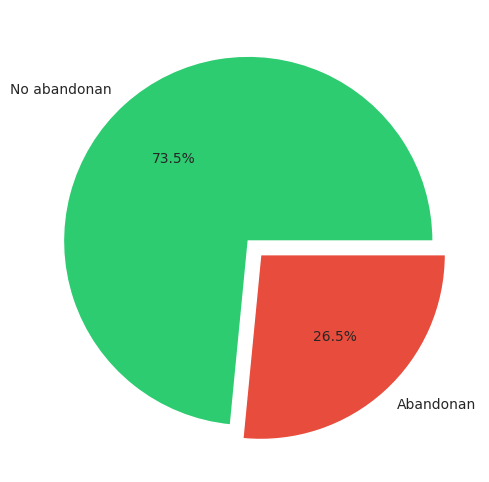

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de distribución de clases
clases = ['No abandonan', 'Abandonan']
porcentajes = [73.463, 26.537]
# Configuración del gráfico
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
# Gráfico de pastel (Pie Chart)
plt.pie(porcentajes,
        labels=clases,
        autopct='%1.1f%%',
        colors=['#2ecc71', '#e74c3c'],
        explode=(0, 0.1))  # Separar ligeramente la clase de abandono

plt.show()

# **Variables categóricas:**

In [6]:
#variables categóricas
data.describe(include='object')

,ID Cliente,Género,Servicio de Internet,Tipo de Contrato,Método de Pago,Rango de Contrato
count,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,4,8
top,9995-HOTOH,M,Fibra Óptica,Mensual,Cheque electrónico,0-10
freq,1,3555,3096,3875,2365,1854


In [7]:
# Eliminación de columnas que no correlacionado al evento.
data = data.drop(columns=['ID Cliente','Costo Diario','Duración del Contrato (meses)'])

In [8]:
#información general del conjunto de datos después de eliminar columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Abandono                           7043 non-null   int64  
 1   Género                             7043 non-null   object 
 2   Mayor de 65 años                   7043 non-null   bool   
 3   Tiene Pareja                       7043 non-null   int64  
 4   Tiene Dependientes                 7043 non-null   int64  
 5   Servicio Telefónico                7043 non-null   int64  
 6   Múltiples Líneas                   7043 non-null   int64  
 7   Servicio de Internet               7043 non-null   object 
 8   Seguridad en Línea                 7043 non-null   int64  
 9   Respaldo en Línea                  7043 non-null   int64  
 10  Protección del Dispositivo         7043 non-null   int64  
 11  Soporte Técnico                    7043 non-null   int64

/tmp/ipython-input-2090551438.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y=columna, data=data, palette='Set2')
/tmp/ipython-input-2090551438.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y=columna, data=data, palette='Set2')
/tmp/ipython-input-2090551438.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Abandono', y=columna, data=data, palette='Set2')


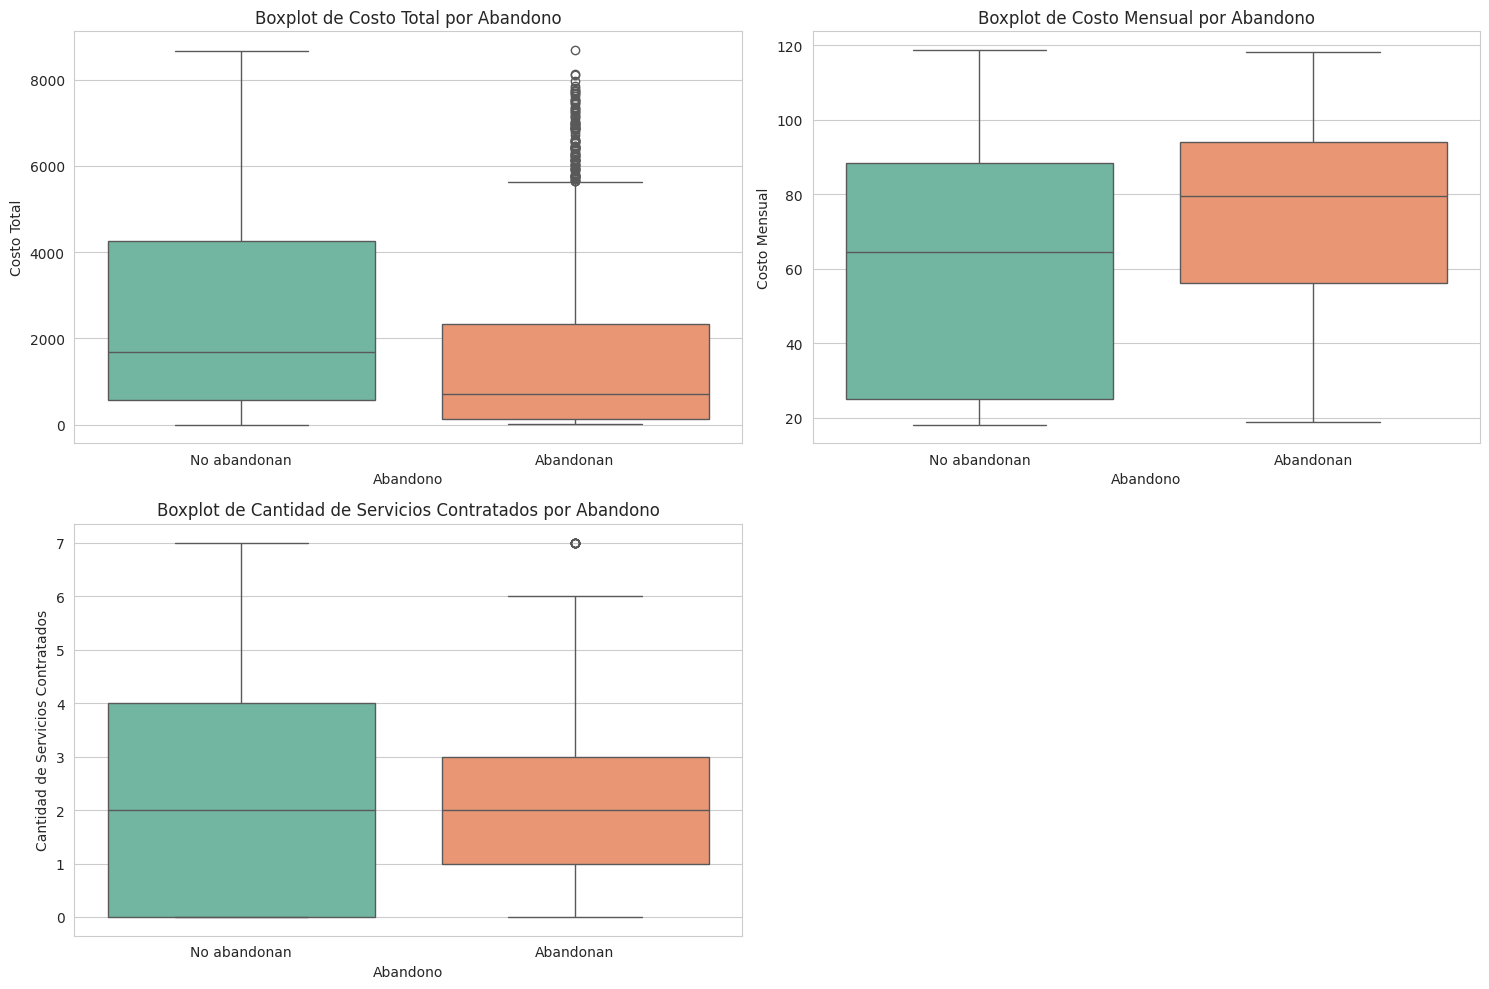

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

columnas_numericas = [
    'Costo Total',
    'Costo Mensual',
    'Cantidad de Servicios Contratados'
]

for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Abandono', y=columna, data=data, palette='Set2')
    plt.xlabel('Abandono')
    plt.title(f'Boxplot de {columna} por Abandono')
    plt.xticks([0, 1], ['No abandonan', 'Abandonan'])
    plt.tight_layout()
plt.show()

In [ ]:
# distribución de las variables numéricas por Abandono(Crunch)
plt.figure(figsize=(16,12))
palette_colorblind = sns.color_palette("Set2")[:2]
# Histogramas por estado de Abandono
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)

    sns.histplot(
        data=data,
        x=columna,
        hue='Abandono',
        multiple="stack",
        palette=palette_colorblind,
        bins=30  # Número de bins
    )

    plt.title(f'Distribución de {columna} por Abandono', fontsize=10)
    plt.xlabel(columna, fontsize=8)
    plt.ylabel('Frecuencia', fontsize=8)
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

plt.suptitle('Distribución de Variables Numéricas por Abandono', fontsize=14)
plt.tight_layout()
plt.show()

# Análisis estadístico complementario
for columna in columnas_numericas:
    print(f"\nEstadísticas para {columna}:")
    print(data.groupby('Abandono')[columna].describe())

In [ ]:
# Comportamiento de las variables binarias relevantes
variables_binarias = ['Tiene Pareja','Tiene Dependientes',
                      'Múltiples Líneas', 'Seguridad en Línea',
                      'Respaldo en Línea', 'Protección del Dispositivo']
for columna in variables_binarias:
    print(columna, data[columna].value_counts(normalize=True)*100)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("colorblind")

plt.figure(figsize=(16,12))
for i, variable in enumerate(variables_binarias, 1):
    plt.subplot(3, 2, i)
    # Gráfico de distribución con abandono
    data_plot = data.groupby([variable, 'Abandono']).size().unstack(fill_value=0)
    data_plot.plot(kind='bar', stacked=True,
                   color=sns.color_palette("Set2"),
                   ax=plt.gca())

    plt.title(f'Distribución de {variable} por Abandono')
    plt.xlabel(variable)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## *Evaluación del p-value:*


In [ ]:
# Chi-cuadrado para medir dependencia
from scipy.stats import chi2_contingency

for columna in variables_binarias:
    contingencia = pd.crosstab(data[columna], data['Abandono'])
    chi2, p_valor, _, _ = chi2_contingency(contingencia)
    print(f"{columna}: p-valor = {p_valor}")


Todas las variables tienen una relación estadísticamente significativa con el abandono.

Hay evidencia de que estas características influyen en la probabilidad de abandon

In [ ]:
# Analisis de variables binarias de servicios adicionales
servicios_internet = [
    'Seguridad en Línea',
    'Respaldo en Línea',
    'Protección del Dispositivo',
    'Soporte Técnico',
    'TV por Cable',
    'Streaming de Películas'
]

# Chi-cuadrado para Múltiples Líneas
print("Dependencias con Múltiples Líneas:")
for servicio in servicios_internet:
    contingencia = pd.crosstab(data['Múltiples Líneas'], data[servicio])
    chi2, p_valor, _, _ = chi2_contingency(contingencia)
    print(f"{servicio}: p-valor = {p_valor}")

# Chi-cuadrado para Servicios de Internet
print("\nDependencias entre Servicios de Internet:")
for i in range(len(servicios_internet)):
    for j in range(i+1, len(servicios_internet)):
        servicio1 = servicios_internet[i]
        servicio2 = servicios_internet[j]
        contingencia = pd.crosstab(data[servicio1], data[servicio2])
        chi2, p_valor, _, _ = chi2_contingency(contingencia)
        print(f"{servicio1} vs {servicio2}: p-valor = {p_valor}")

In [ ]:
plt.figure(figsize=(20,20))
corr = data[servicios_internet].corr()
print("Distribución de correlaciones entre los Servicios de Internet:")
print(corr)
print('\n')
# Heatmap de correlación
print("Mapa de calor de correlación entre Servicios de Internet:")
plt.subplot(2,1,1)

sns.heatmap(
    data[servicios_internet].corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,   # Separación entre celdas
    fmt='.2f',        # Formato de números
    square=True,      # Celdas cuadradas
    cbar_kws={'label': 'Correlación'},
    annot_kws={
        'size': 8,    # Tamaño de fuente
        'weight': 'bold',
        'color': 'black'
    }
)
plt.title('Correlación entre Servicios de Internet')

# Distribución de servicios
plt.subplot(2,1,2)
servicios_count = data[servicios_internet].sum()
sns.barplot(x=servicios_count.index, y=servicios_count.values, palette='viridis')
plt.title('Cantidad de Servicios Contratados')
plt.xticks(rotation=45)
plt.ylabel('Cantidad contratada')
plt.xlabel('Tipo de servicio')

plt.tight_layout()
plt.show()

In [ ]:
def analisis_abandono_servicios(servicios):
    resultados = {}
    for servicio in servicios:
        abandono_con_servicio = data[data[servicio] == 1]['Abandono'].mean()
        abandono_sin_servicio = data[data[servicio] == 0]['Abandono'].mean()

        resultados[servicio] = {
            'Abandono con servicio': abandono_con_servicio,
            'Abandono sin servicio': abandono_sin_servicio,
            'Diferencia': abandono_con_servicio - abandono_sin_servicio
        }

    return pd.DataFrame.from_dict(resultados, orient='index')

# Análisis de abandono
print("Análisis de Abandono por Servicios:")
print(analisis_abandono_servicios(servicios_internet))

In [ ]:
# Número de servicios contratados
data['Servicios_Contratados'] = data[servicios_internet].sum(axis=1)

plt.figure(figsize=(10,6))
sns.boxplot(x='Servicios_Contratados', y='Costo Mensual', hue='Abandono', data=data, palette='Set2')
plt.xlabel('Servicios Contratados')
plt.title('Servicios Contratados vs Costo Mensual y Abandono')
plt.show()

Analisis de Servicios adicionales de Servicio Telefónico e Internet

Todos los servicios reducen la probabilidad de abandono
Priorizar Seguridad en Línea y Soporte Técnico
Servicios con alta correlación pueden ser empaquetados

In [ ]:
# Variables categóricas
categoricas = ['Género', 'Servicio de Internet', 'Tipo de Contrato', 'Método de Pago', 'Rango de Contrato']
plt.figure(figsize=(16,20))

for i, variable in enumerate(categoricas, 1):
    plt.subplot(3, 2, i)

    # Gráfico de distribución con abandono
    data_plot = data.groupby([variable, 'Abandono']).size().unstack(fill_value=0)
    data_plot_percent = data_plot.div(data_plot.sum(axis=1), axis=0) * 100

    data_plot_percent.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Distribución de Abandono por {variable}')
    plt.xlabel(variable)
    plt.ylabel('Porcentaje')
    plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Chi-cuadrado para evaluar dependencia
from scipy.stats import chi2_contingency

for variable in categoricas:
    contingencia = pd.crosstab(data[variable], data['Abandono'])
    chi2, p_value, dof, expected = chi2_contingency(contingencia)

    print(f"\nVariable: {variable}")
    print(f"Chi-cuadrado: {chi2}")
    print(f"P-value: {p_value}")
    print("Significativa:" + " Sí" if p_value < 0.05 else " No")

# *Información Mutua con Variable Abandono*

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_encoded = data[categoricas].apply(le.fit_transform)

# Calcular información mutua
mi_scores = mutual_info_classif(X_encoded, data['Abandono'])

# Visualizar
plt.figure(figsize=(10,6))
plt.bar(categoricas, mi_scores)
plt.title('Información Mutua con Variable Abandono')
plt.xlabel('Variables Categóricas')
plt.ylabel('Puntuación de Información Mutua')
plt.show()

# Imprimir scores
for var, score in zip(categoricas, mi_scores):
    print(f"{var}: {score}")

In [ ]:
# Análisis de la tasa de abandono por rango de contrato

plt.figure(figsize=(10,6))
churn_by_contract = data.groupby('Rango de Contrato')['Abandono'].mean()
churn_by_contract.plot(kind='bar')
plt.title('Tasa de Abandono por Rango de Contrato')
plt.ylabel('Tasa de Abandono')
plt.xlabel('Rango de Contrato')
plt.tight_layout()
plt.show()

# *Detección y tratamiento de outliers*

In [ ]:
def agrupar_por_churn(rango):
    if rango in ['0-10', '11-20']:
        return 'Riesgo Alto'
    elif rango in ['21-30', '31-40']:
        return 'Riesgo Medio'
    else:
        return 'Riesgo Bajo'

data['Rango_Contrato'] = data['Rango de Contrato'].apply(agrupar_por_churn)
#Eliminar columna original
data = data.drop(columns=['Rango de Contrato'])

In [ ]:
import numpy as np
from scipy import stats
# Transformaciones
data['log_costo_total'] = np.log1p(data['Costo Total'])
data['sqr_costo_total']= np.sqrt(data['Costo Total'])
#data['log_costo_total'] = stats.boxcox(data['Costo Total'] + 1)
data['boxcx_costo_mensual'], _ = stats.boxcox(data['Costo Mensual'] + 1)
data['sqr_costo_mensual'] = np.sqrt(data['Costo Mensual'])
#data['sqr_duracion_contrato'] = np.sqrt(data['Duración del Contrato (meses)'])
data['sqr_servicios'] = np.sqrt(data['Cantidad de Servicios Contratados'])
data.head()

In [ ]:
plt.figure(figsize=(15,10))

# Columnas numéricas
columnas_numericas = [
    'log_costo_total',
    'boxcx_costo_mensual',
    'Cantidad de Servicios Contratados',
    'sqr_costo_total',
    'sqr_costo_mensual',
    'sqr_servicios'
]

# Visualización de boxplots por estado de Abandono de las columnas numéricas
plt.figure(figsize=(16,12))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Abandono', y=columna, data=data, palette='Set2')
    plt.xlabel('Abandono')
    plt.title(f'Boxplot de {columna} por Abandono')
    plt.xticks([0, 1], ['No Abandono', 'Abandono'])

plt.tight_layout()
plt.show()

In [ ]:
#eliminar variables transformadas porque no logran una mejora significativa en la distribución
data = data.drop(columns=['log_costo_total', 'boxcx_costo_mensual'])

In [ ]:
#eliminar las variables originales, posteriormene se analizará si se vuelven a incluir
data = data.drop(columns=['Costo Total','Costo Mensual','Cantidad de Servicios Contratados'])

In [ ]:
data.columns

## *Codificación de variables categóricas*

In [ ]:
# One-Hot Encoding con get_dummies
categoricas = ['Género', 'Tipo de Contrato', 'Método de Pago','Rango_Contrato', 'Servicio de Internet']

# Aplicación básica
data_encoded = pd.get_dummies(data, columns=categoricas)

# Opciones adicionales
data_encoded = pd.get_dummies(
    data,
    columns=categoricas,
    prefix=categoricas,  # Prefijo para nuevas columnas
    drop_first=True     # Elimina primera categoría para evitar multicolinealidad
)
print("\nColumnas después de One-Hot Encoding:")
print(data_encoded.shape)
print(data_encoded.columns)

In [ ]:
# analisis de correlación
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
correlation_matrix = data_encoded.corr()

# Extraer variables de interés
print("\nVariables de Interes en Matriz de Correlación:")
print(correlation_matrix['Abandono'].sort_values(ascending=False))

sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            cbar_kws={"shrink": .8},
            linewidths=0.5,   # Separación entre celdas
            annot_kws={
        'size': 8,    # Tamaño de fuente
        'weight': 'bold',
        'color': 'black'
    }
            )
plt.title('Matriz de Correlación')
plt.show()

### **Correlaciones Positivas (Aumentan probabilidad de Abandono):**

Tipo de Contrato_Mensual (0.405).

Servicio de Internet_Fibra Óptica (0.308).

sqr_costo_mensual (0.203).

Facturación Sin Papel (0.192).

TV por Cable (0.165).

Streaming de Películas (0.163).

Mayor de 65 años (0.151).


#### **Correlaciones Negativas (Disminuyen probabilidad de Abandono):**

Rango_Contrato_Riesgo Bajo (-0.284).

Tipo de Contrato_Bianual (-0.302).

Servicio de Internet_No internet service (-0.228).

sqr_costo_total (-0.223).

Tiene Dependientes (-0.164).

Tiene Pareja (-0.150).

Método de Pago_Tarjeta de crédito (automático) (-0.134).

# **Preparación para el modelado.**

In [ ]:
# Variable dependiente
y = data_encoded['Abandono']
# Variables independientes
X = data_encoded.drop(columns=['Abandono'])

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Balanceo de clase

In [ ]:
# Contar distribución de clases
distribucion = data_encoded['Abandono'].value_counts(normalize=True)
print(distribucion)

# Calcular ratio de desbalanceo
ratio = len(data_encoded[data_encoded['Abandono']==0]) / len(data[data['Abandono']==1])
print(f"Ratio de desbalanceo: {ratio}")

No se aplicará balanceo ya que tiene una ratio de desbalanceo moderado de 2.77 (no extremo), por lo tanto no es un desbalanceo crítico (generalmente se considera crítico >5)

## **Entrenamiento de Modelos***

### *3.1 Selección de los Modelos*
#### Random Forest: ✅ Adecuado
     Robusto con distintos tipos de variables.
     Buena interpretabilidad.
     Captura no linealidades

##### CatBoost: ✅ Muy bueno
      Excelente con variables categóricas.
      Maneja binarias perfectamente.
      Reduce sesgo de codificación.

#### Xgboost: ✅ Excelente
      Alto rendimiento predictivo.
      Control de complejidad del modelo.
      Rápido y escalable.

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100,
                                  random_state=42)
model_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = model_rf.predict(X_test)

#### Catboost

In [ ]:
%pip install catboost

In [ ]:
from catboost import CatBoostClassifier

# Configuración del modelo CatBoost
model_cb = CatBoostClassifier(
    iterations=500,  # Aumentar iteraciones
    learning_rate= 0.1,  # Probar diferentes tasas
    depth=6,  # Variar profundidad
    l2_leaf_reg=3,  # Regularización
    random_seed=42,
    verbose=0  # Quita mensajes de progreso
)

# Entrenar el modelo CatBoost
model_cb.fit(X_train, y_train)
# Hacer predicciones
y_pred_cb = model_cb.predict(X_test)

#### Xgboost

In [ ]:
%pip install xgboost

In [ ]:
import xgboost as xgb

# Entrenar el modelo XGBoost
model_xgb = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)
# Hacer predicciones
y_pred_xgb = model_xgb.predict(X_test)

# **Evaluación de modelos**

#### Métricas Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Random Forest
print("Métricas Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#### Métricas de CatBoost

In [ ]:
# CatBoost
print("\nMétricas de CatBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_cb))
print("Precision:", precision_score(y_test, y_pred_cb))
print("Recall:", recall_score(y_test, y_pred_cb))
print("F1-score:", f1_score(y_test, y_pred_cb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_cb))
print(classification_report(y_test, y_pred_cb))

#### Métricas XGBoost

In [ ]:
# XGBoost
print("\nMetricas de XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

### Ajuste de modelos

#### Random Forest

In [ ]:
# Aumentar la complejidad del modelo
model_ajustado_rf = RandomForestClassifier(
    n_estimators=150,        # Más árboles
    max_depth=10,            # Mayor profundidad máxima
    min_samples_split=5,     # Menos muestras para dividir un nodo
    min_samples_leaf=3,      # Menos muestras en una hoja
    max_features='sqrt',     # Número de características a considerar en cada división
    random_state=42
)

model_ajustado_rf.fit(X_train, y_train)
y_pred_ajustado_rf= model_ajustado_rf.predict(X_test)

#### CatBoost

In [ ]:
# Aumentar la complejidad y ajustar parámetros de CatBoost
from catboost import CatBoostClassifier
model_ajustado_cb = CatBoostClassifier(
    iterations=500,          # Más iteraciones
    learning_rate=0.01,     # Tasa de aprendizaje más baja
    depth=8,                # Mayor profundidad
    l2_leaf_reg=3,          # Regularización L2
    random_seed=42,
    verbose=0               # Quitar mensajes de progreso
)
model_ajustado_cb.fit(X_train, y_train)
y_pred_ajustado_cb = model_ajustado_cb.predict(X_test)

#### XGBoost

In [ ]:
# Aumentar la complejidad y ajustar parámetros de XGBoost
model_ajustado_xgb = xgb.XGBClassifier(
    n_estimators=150,         # Más árboles
    max_depth=10,             # Mayor profundidad máxima
    learning_rate=0.05,       # Tasa de aprendizaje más baja
    subsample=0.8,            # Porcentaje de muestras para cada árbol
    colsample_bytree=0.8,     # Porcentaje de columnas para cada árbol
    eval_metric='logloss',
    random_state=42,
    reg_alpha=0.1,          # Regularización L1
    reg_lambda=1.0          # Regularización L2
)

model_ajustado_xgb.fit(X_train, y_train)
y_pred_ajustado_xgb = model_ajustado_xgb.predict(X_test)

### Evaluación de los modelos ajustados

#### Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_ajustado_rf))
print("Precision:", precision_score(y_test, y_pred_ajustado_rf))
print("Recall:", recall_score(y_test, y_pred_ajustado_rf))
print("F1-score:", f1_score(y_test, y_pred_ajustado_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_ajustado_rf))
print(classification_report(y_test, y_pred_ajustado_rf))

#### CatBoost

In [ ]:
# CatBoost
print("\nCatBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_ajustado_cb))
print("Precision:", precision_score(y_test, y_pred_ajustado_cb))
print("Recall:", recall_score(y_test, y_pred_ajustado_cb))
print("F1-score:", f1_score(y_test, y_pred_ajustado_cb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_ajustado_cb))
print(classification_report(y_test, y_pred_ajustado_cb))

#### XGBoost

In [ ]:
print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_ajustado_xgb))
print("Precision:", precision_score(y_test, y_pred_ajustado_xgb))
print("Recall:", recall_score(y_test, y_pred_ajustado_xgb))
print("F1-score:", f1_score(y_test, y_pred_ajustado_xgb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_ajustado_xgb))
print(classification_report(y_test, y_pred_ajustado_xgb))

## Entrenamiento y evaluación en datos de entrenamiento:

In [ ]:
# Entrenamiento y evaluación en datos de entrenamiento
y_train_pred_ajustado_rf = model_ajustado_rf.predict(X_train)
y_train_pred_ajustado_cb = model_ajustado_cb.predict(X_train)
y_train_pred_xgb_ajustado = model_ajustado_xgb.predict(X_train)

print("Random Forest - Entrenamiento:", accuracy_score(y_train, y_train_pred_ajustado_rf))
print("Random Forest - Prueba:", accuracy_score(y_test, y_pred_ajustado_rf))

print("CatBoost - Entrenamiento:", accuracy_score(y_train, y_train_pred_ajustado_cb))
print("CatBoost - Prueba:", accuracy_score(y_test, y_pred_ajustado_cb))

print("XGBoost - Entrenamiento:", accuracy_score(y_train, y_train_pred_xgb_ajustado))
print("XGBoost - Prueba:", accuracy_score(y_test, y_pred_ajustado_xgb))

### Análisis de Overfitting:

#### Random Forest
     Entrenamiento: 85.00%
     Prueba: 79.42%
     Diferencia: 5.58% (Moderado overfitting)

#### CatBoost
     Entrenamiento: 84.47%
     Prueba: 79.35%
     Diferencia: 5.12% (Moderado overfitting)

#### XGBoost
     Entrenamiento: 94.50%
     Prueba: 77.86%
     Diferencia: 16.64% (Alto overfitting)

### **Interpretación**
     XGBoost: Mayor sobreajuste
     Random Forest: Mejor generalización
     CatBoost: Equilibrio intermedi

## **Validación cruzada**


In [ ]:
# Validación cruzada para evaluar la estabilidad del modelo
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(model_ajustado_rf, X, y, cv=5, scoring='accuracy')
print("Random Forest - Validación cruzada (accuracy):", rf_scores.mean())

cb_scores = cross_val_score(model_ajustado_cb, X, y, cv=5, scoring='accuracy')
print("CatBoost - Validación cruzada (accuracy):", cb_scores.mean())

xgb_scores = cross_val_score(model_ajustado_xgb, X, y, cv=5, scoring='accuracy')
print("XGBoost - Validación cruzada (accuracy):", xgb_scores.mean())

## **Dataframe de variables reducidas**
Se considera reducir el dataset para disminuye la complejidad del modelo, reduce el ruido y el manejar el sobreajuste usando importancia de características

In [ ]:
#importancia de las características
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model_rf.feature_importances_)
}).sort_values('importance', ascending=False)
print(importance.head())

In [ ]:
features = X.columns
importances = model_rf.feature_importances_
#crear DataFrame X_reduced
low_importance = [feature for feature, importance in zip(features, importances) if importance < 0.01]
print("Variables a eliminar:", low_importance)
X_reduced = X.drop(columns=low_importance)

### Random forest con variables reducidas

In [ ]:
#Modelo Random Forest con las variables reducidas
rdmforest_model_reducido = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42
)

rdmforest_model_reducido.fit(X_reduced, y)
y_pred_rf_reducido = rdmforest_model_reducido.predict(X_test.drop(columns=low_importance))

### CatBoost con variables reducidas

In [ ]:
#Modelo CatBoost con las variables reducidas
model_ajustado_cb_reducido = CatBoostClassifier(
    iterations=500,
    learning_rate=0.01,
    depth=8,
    l2_leaf_reg=3,
    random_seed=42,
    verbose=0
)

model_ajustado_cb_reducido.fit(X_reduced, y)
y_pred_cb_reducido = model_ajustado_cb_reducido.predict(X_test.drop(columns=low_importance))

### XGBoost con variables reducidas

In [ ]:
#Modelo XGBoost con las variables reducidas
model_ajustado_xgb_reducido = xgb.XGBClassifier(
    n_estimators=150,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    reg_alpha=0.1,
    reg_lambda=1.0
)
model_ajustado_xgb_reducido.fit(X_reduced, y)
y_pred_xgb_reducido = model_ajustado_xgb_reducido.predict(X_test.drop(columns=low_importance))

### Evaluación de modelos de variables reducidas

In [ ]:
#Comparar resultados de los modelos con variables reducidas
print("Random Forest con variables reducidas:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_reducido))
print("Precision:", precision_score(y_test, y_pred_rf_reducido))
print("Recall:", recall_score(y_test, y_pred_rf_reducido))
print("F1-score:", f1_score(y_test, y_pred_rf_reducido))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf_reducido))
print(classification_report(y_test, y_pred_rf_reducido))

In [ ]:
#Comparar resultados de los modelos con variables reducidas
print("CatBoost con variables reducidas:")
print("Accuracy:", accuracy_score(y_test, y_pred_cb_reducido))
print("Precision:", precision_score(y_test, y_pred_cb_reducido))
print("Recall:", recall_score(y_test, y_pred_cb_reducido))
print("F1-score:", f1_score(y_test, y_pred_cb_reducido))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_cb_reducido))
print(classification_report(y_test, y_pred_cb_reducido))

In [ ]:
#Comparar resultados de los modelos con variables reducidas
print("XGBoost con variables reducidas:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_reducido))
print("Precision:", precision_score(y_test, y_pred_xgb_reducido))
print("Recall:", recall_score(y_test, y_pred_xgb_reducido))
print("F1-score:", f1_score(y_test, y_pred_xgb_reducido))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_xgb_reducido))
print(classification_report(y_test, y_pred_xgb_reducido))

XGBoost muestra la mejora significativa y se observa que la reducción de variables mejoró el sobreajuste. Tambien observamos que todos los modelos mejoraron su rendimiento.

Se refuerza la idea que XGBoost con variables reducidas es el mejor modelo.

### Validación Cruzada con variables reducidas

In [ ]:
# Validación cruzada para evaluar la estabilidad del modelo con variables reducidas
rf_reduced_scores = cross_val_score(rdmforest_model_reducido, X_reduced, y, cv=5, scoring='accuracy')
print("Random Forest Reducido - Validación cruzada (accuracy):", rf_reduced_scores.mean())
print("CatBoost Reducido - Validación cruzada (accuracy):", cross_val_score(model_ajustado_cb_reducido, X_reduced, y, cv=5, scoring='accuracy').mean())
print("XGBoost Reducido - Validación cruzada (accuracy):", cross_val_score(model_ajustado_xgb_reducido, X_reduced, y, cv=5, scoring='accuracy').mean())

XGBoost tambien técnicamente tiene un manejo eficiente de variables, capacidad de aprendizaje incremental y tratamiento robusto de datos no lineales.

### Ajuste de umbral

Realizar análisis de curva ROC para encontrar umbral óptimo que maximice rendimiento del modelo.

In [ ]:
# Probabilidades de cada modelo sin cambios
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_prob_cb = model_cb.predict_proba(X_test)[:, 1]
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

#Curva ROC y AUC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
# Curva ROC y AUC para CatBoost
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_prob_cb)
auc_cb = roc_auc_score(y_test, y_prob_cb)
# Curva ROC y AUC para XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Graficar todas las curvas ROC
# Paleta de colores accesible
colores = {
    'rf_color': '#1E90FF',     # Azul dodger
    'cb_color': '#FF6B6B',
    'linea_diagonal': '#808080',       # Gris
    'relleno': '#87CEFA',              # Azul claro
}
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color=colores['rf_color'], label=f'Random Forest (AUC={auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.2f})')
plt.plot(fpr_cb, tpr_cb, color=colores['cb_color'], label=f'CatBoost(AUC={auc_cb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Comparación de Curvas ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
# Sombreado
plt.fill_between(
    fpr_rf,
    tpr_rf,
    color=colores['relleno'],
    alpha=0.3
)


plt.tight_layout()
plt.show()

print(f"AUC Random Forest: {auc_rf:.2f}")
print(f"AUC XGBoost: {auc_xgb:.2f}")
print(f"AUC LightGBM: {auc_cb:.2f}")

In [ ]:
# Probabilidades de cada modelo reducido


y_prob_rf = rdmforest_model_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
y_prob_cb = model_ajustado_cb_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
y_prob_xgb = model_ajustado_xgb_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
#Curva ROC y AUC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
# Curva ROC y AUC para CatBoost
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_prob_cb)
auc_cb = roc_auc_score(y_test, y_prob_cb)
# Curva ROC y AUC para XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Graficar todas las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color=colores['rf_color'], label=f'Random Forest (AUC={auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.2f})')
plt.plot(fpr_cb, tpr_cb, color=colores['cb_color'], label=f'CatBoost(AUC={auc_cb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Comparación de Curvas ROC de Modelos con Variables Reducidas')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
# Sombreado
plt.fill_between(
    fpr_rf,
    tpr_rf,
    color=colores['relleno'],
    alpha=0.3
)
plt.tight_layout()
plt.show()

print(f"AUC Random Forest Reducido: {auc_rf:.2f}")
print(f"AUC XGBoost Reducido: {auc_xgb:.2f}")
print(f"AUC LightGBM Reducido: {auc_cb:.2f}")

In [ ]:
#Ajuste de umbral para mejorar precisión y recall
y_proba = rdmforest_model_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]

umbral = 0.45
y_pred_rf_umbral = (y_proba > umbral).astype(int)

print("Random Forest con umbral ajustado (0.45):")
print(classification_report(y_test, y_pred_rf_umbral))

In [ ]:
# Obtener probabilidades de abandono con CatBoost
y_proba_cb = model_ajustado_cb_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
umbral = 0.4
y_pred_cb_umbral = (y_proba_cb > umbral).astype(int)
print("CatBoost con umbral ajustado (0.4):")
print(classification_report(y_test, y_pred_cb_umbral))

In [ ]:
#Obtener probabilidades de abandono con XGBoost
y_proba_xgb = model_ajustado_xgb_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
umbral = 0.45
y_pred_xgb_umbral = (y_proba_xgb > umbral).astype(int)
print("XGBoost con umbral ajustado (0.4):")
print(classification_report(y_test, y_pred_xgb_umbral))

 Análisis de Resultados

XGBoost se destaca con la mejor precisión (0.96) y recall (0.95), lo que indica que es muy efectivo en la identificación de la clase positiva (1) y tiene un bajo número de falsos positivos.
Random Forest tiene un buen rendimiento, especialmente en recall (0.90), lo que sugiere que es efectivo en la detección de positivos, aunque su precisión es un poco menor en comparación con XGBoost.
CatBoost muestra un rendimiento sólido, pero no alcanza los niveles de XGBoost. Su precisión es alta, pero el recall es un poco más bajo, lo que puede indicar que está perdiendo algunos verdaderos positivos.

## **Interpretación**
#### 6.1 Analisis de las variables relevantes de XGBoost Reducido:

Se revisan las variables mas relevantes para la predicción de cancelación en el modelo XGBoost reducido (el cual ha sido el modelo con mejores resultados ) y Random Forest reducido, este enfoque complementado permite identificar los factores críticos que influyen en la deserción de clientes que permitan desarrollar estrategias de retención más efectivas y personalizadas. Con esta técnica se busca equilibrar la complejidad computacional, interpretabilidad y poder predictivo.

In [ ]:
importancia = model_ajustado_xgb_reducido.feature_importances_
feature_importance = sorted(
    zip(X.columns, importancia),
    key=lambda x: x[1],
    reverse=True
)
importance_xgb = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])
print("\nImportancia de las características en XGBoost con variables reducidas:")
print(importance_xgb.head(10))

In [ ]:
gain_xgb = model_ajustado_xgb_reducido.get_booster().get_score(importance_type='gain')
gain_xgb = sorted(gain_xgb.items(), key=lambda x: x[1], reverse=True)
importance_gain_xgb = pd.DataFrame(gain_xgb, columns=['Feature', 'Importance'])
print("\nImportancia de Características por Gain:")
print(importance_gain_xgb.head(10))

In [ ]:
#Cobertura para modelo XGBoost
cover_xgb = model_ajustado_xgb_reducido.get_booster().get_score(importance_type='cover')
cover_xgb = sorted(cover_xgb.items(), key=lambda x: x[1], reverse=True)
importance_cover_xgb = pd.DataFrame(cover_xgb, columns=['Feature', 'Importance'])
print("\nImportancia de Características por Cobertura:")
print(importance_cover_xgb.head(10))

In [ ]:
def graficar_importancia_xgboost(model, X, top_n=10):
    """
    Grafica la importancia de características de XGBoost desde diferentes perspectivas.

    Parámetros:
    - model: Modelo XGBoost entrenado
    - X: DataFrame de características
    - top_n: Número de características top a mostrar
    - paleta: Paleta de colores para el gráfico
    """
    # Obtener diferentes tipos de importancia
    importancia_default = model_ajustado_xgb_reducido.feature_importances_
    gain_importancia = model_ajustado_xgb_reducido.get_booster().get_score(importance_type='gain')
    cover_importancia = model_ajustado_xgb_reducido.get_booster().get_score(importance_type='cover')

    # Crear DataFrames
    def crear_df_importancia(importancia_dict, columnas):
        if isinstance(importancia_dict, np.ndarray):
            df = pd.DataFrame({
                'Feature': columnas,
                'Importance': importancia_dict
            })
        else:
            df = pd.DataFrame.from_dict(importancia_dict, orient='index', columns=['Importance'])
            df['Feature'] = df.index

        return df.sort_values('Importance', ascending=False).head(top_n)

    # Preparar DataFrames
    df_default = crear_df_importancia(importancia_default, X.columns)
    df_gain = crear_df_importancia(gain_importancia, X.columns)
    df_cover = crear_df_importancia(cover_importancia, X.columns)

    # Configurar el gráfico
    plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace=0.4, wspace=0.3)

    # Paleta de colores
    colores = plt.cm.get_cmap()(np.linspace(0, 1, top_n))

    # Subplot 1: Importancia por Defecto
    plt.subplot(2, 2, 1)
    sns.barplot(x='Importance', y='Feature', data=df_default, palette=colores )
    plt.title('Importancia por Defecto', fontweight='bold')
    plt.xlabel('Importancia')
    plt.ylabel('Características')

    # Subplot 2: Importancia por Gain
    plt.subplot(2, 2, 2)
    sns.barplot(x='Importance', y='Feature', data=df_gain, palette=colores)
    plt.title('Importancia por Gain', fontweight='bold')
    plt.xlabel('Importancia Gain')
    plt.ylabel('Características')

    # Subplot 3: Importancia por Cobertura
    plt.subplot(2, 2, 3)
    sns.barplot(x='Importance', y='Feature', data=df_cover, palette=colores)
    plt.title('Importancia por Cobertura', fontweight='bold')
    plt.xlabel('Importancia de Cobertura')
    plt.ylabel('Características')

    # Subplot 4: Comparación de Importancias Normalizadas
    plt.subplot(2, 2, 4)
    # Normalizar importancias
    dfs = [df_default, df_gain, df_cover]
    nombres = ['Default', 'Gain', 'Cobertura']
    for df, nombre, color in zip(dfs, nombres, colores):
        sns.barplot(x='Importance', y='Feature', data=df, label=nombre, color=color)
    plt.title('Comparación de Importancias Normalizadas', fontweight='bold')
    plt.xlabel('Importancia Normalizada')
    plt.ylabel('Características')
    plt.legend(title='Tipo de Importancia')
    plt.tight_layout()
    plt.show()
graficar_importancia_xgboost(model_ajustado_xgb_reducido, X_reduced, top_n=10)

El 'Tipo de Contrato_Mensual' es una característica dominante y significativa en los análisis de importancia (por Defecto, por Gain y por Cobertura), lo que indica su preponderancia en el comportamiento estudiado. Su valor de importancia es consistentemente el más alto en las tres métricas.
Otras características que muestran una importancia consistentemente alta son el "Servicio de Internet_Fibra Óptica" y el "Tipo de Contrato_Bianual". Estas dos características se sitúan entre las principales, confirmando su relevancia después del "Tipo de Contrato_Mensual".
Factores como "Seguridad en Línea", "Rango_Contrato_Riesgo Bajo" y "sqr_costo_total" también presentan una importancia notable en diversas métricas, sugiriendo que contribuyen de manera significativa, aunque en menor medida que las principales. • Características como el "Método de Pago_Tarjeta de crédito (automático)" y "Múltiples Líneas" adquieren una relevancia particular en la importancia por Cobertura, lo que sugiere que, aunque no son tan dominantes como el tipo de contrato o servicio de internet, su presencia es importante en términos de la frecuencia de uso en las decisiones o interacciones del modelo. En resumen, el tipo de contrato (especialmente mensual y bianual) y el tipo de servicio de internet (fibra óptica) son los factores más críticos y consistentes en la determinación de los resultados, seguidos por características relacionadas con la seguridad, el rango de duración del contrato y el costo.

## Análisis complementario de variables relevantes Random Forest

In [ ]:
from sklearn.inspection import permutation_importance
# Importancia nativa del modelo
importancia_nativa = rdmforest_model_reducido.feature_importances_
#imprimir 10 de las variables más importantes de la importancia_nativa
features = X_reduced.columns
importances = importancia_nativa
feature_importance = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])
print("\nImportancia Nativa del Modelo:")
print(importance_df.head(10))

# Cálculo de reducción de impureza
importancia_impureza = rdmforest_model_reducido.feature_importances_
# permutacion_importance para evaluar la importancia de las características
#Imprimir 10 de las variables más importantes de la importancia_impureza
features = X_reduced.columns
importances = importancia_impureza
feature_importance_impureza = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
importance_df_impureza = pd.DataFrame(feature_importance_impureza, columns=['Feature', 'Importance'])
print("\nImportancia por Reducción de Impureza:")
print(importance_df_impureza.head(10))

# Evaluar la importancia de las características con permutación
rdmforest_model_reducido.fit(X_reduced, y)
result = permutation_importance(
    rdmforest_model_reducido,
    X_test.drop(columns=low_importance),
    y_test,
    n_repeats=30,
    random_state=42
)
importancia_permutacion = result.importances_mean
#Imprimir 10 de las variables más importantes de la importancia_permutacion
features = X_reduced.columns
importances = importancia_permutacion
feature_importance_permutacion = sorted(zip(features, importances), key=lambda x: x [1], reverse=True)
importance_df_permutacion = pd.DataFrame(feature_importance_permutacion, columns=['Feature', 'Importance'])
print("\nImportancia por Permutación:")
print(importance_df_permutacion.head(10))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def graficar_importancias(importancia_nativa, importancia_impureza, importancia_permutacion,
                           caracteristicas, paleta_colores='colorblind'):
    """
    Grafica la importancia de características con colores inclusivos.

    Parámetros:
    - importancia_nativa: array de importancias nativas
    - importancia_impureza: array de importancias por reducción de impureza
    - importancia_permutacion: array de importancias por permutación
    - caracteristicas: nombres de las características
    - paleta_colores: paleta de colores accesible (defecto: colorblind)
    """
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    # Seleccionar paleta de colores inclusiva
    if paleta_colores == 'colorblind':
        colores = sns.color_palette("colorblind")
    elif paleta_colores == 'pastel':
        colores = sns.color_palette("pastel")
    else:
        colores = plt.cm.get_cmap(paleta_colores)(np.linspace(0, 1, 3))

    # Calcular importancia total y ordenar en orden inverso
    importancia_total = importancia_nativa + importancia_impureza + importancia_permutacion
    orden = np.argsort(importancia_total)

    # Crear gráfico de barras horizontales apiladas
    plt.barh(caracteristicas[orden], importancia_nativa[orden],
             label='Importancia Nativa', color=colores[0], alpha=0.8, height=0.8)
    plt.barh(caracteristicas[orden], importancia_impureza[orden],
             left=importancia_nativa[orden], label='Reducción de Impureza',
             color=colores[1], alpha=0.8, height=0.8)
    plt.barh(caracteristicas[orden], importancia_permutacion[orden],
             left=importancia_nativa[orden]+importancia_impureza[orden],
             label='Importancia por Permutación', color=colores[2], alpha=0.8, height=0.8)

    # Configuraciones de estilo
    plt.xlabel('Importancia', fontsize=12, fontweight='bold')
    plt.ylabel('Características', fontsize=12, fontweight='bold')
    plt.title('Importancia de Características (Orden Ascendente)',
              fontsize=14, fontweight='bold')

    # Leyenda adaptativa
    plt.legend(loc='best', title='Tipos de Importancia',
               title_fontsize=10, fontsize=9)

    # Mejoras de accesibilidad
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

# Ejemplo de uso
graficar_importancias(
    importancia_nativa=importancia_nativa,
    importancia_impureza=importancia_impureza,
    importancia_permutacion=importancia_permutacion,
    caracteristicas=X_reduced.columns,
    paleta_colores='colorblind'  # Opciones: 'colorblind', 'pastel', o cualquier mapa de colores de matplotlib
)

In [ ]:
# Variables top consistentes para random forest
top_features_rf = set(X_reduced.columns[importancia_nativa > 0.01]) & set(X_reduced.columns[importancia_impureza > 0.01]) & set(X_reduced.columns[importancia_permutacion > 0.01])
print("\nVariables Top Consistentes en Importancias de Random Forest:")
print(top_features_rf)

A pesar de que XGBoost fue seleccionado como el modelo de mejor rendimiento, la revisión y el análisis de la importancia de características utilizando Random Forest resultó ser valiosa. Esta aproximación no solo valida y reforza la confianza en los hallazgos iniciales, sino que también proporcionó perspectivas complementarias sobre los factores influyentes.

El análisis con Random Forest confirmó la importancia robusta de características como el "Tipo de Contrato_Mensual" y el "Servicio de Internet_Fibra Óptica". Estas características demostraron ser las más influyentes en ambos algoritmos y a través de diversas métricas de importancia (Defecto, Gain, Cobertura en XGBoost; y Nativa, Reducción de Impureza, Permutación en Random Forest). Esta consistencia es un fuerte indicador de que estas variables poseen un impacto fundamental en el comportamiento modelado, independientemente de las particularidades algorítmicas de XGBoost o Random Forest.

Además, el análisis con Random Forest reveló una mayor prominencia de las variables de costo, específicamente "sqr_costo_total" y "sqr_costo_mensual". Si bien estas ya aparecían en los análisis de XGBoost, Random Forest las elevó a las primeras posiciones, sugiriendo que, para este tipo de modelo, su influencia es particularmente significativa. Esta ayuda a evitar el sesgo de confiar únicamente en un algoritmo y ofrece una visión más robusta de los impulsores clave. Evaluar múltiples algoritmos para la importancia de características asegura que las conclusiones sean independientes del modelo y, por lo tanto, más confiables y accionables.

## Anexos

In [ ]:
#Generación del Modelo XGBoost con las variables reducidas entrenado
# Guardar el modelo entrenado
import joblib
joblib.dump(model_ajustado_xgb_reducido, 'modelo_xgboost_reducido.pkl')